In [77]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
sns.set()

In [78]:
df_confirmed = pd.read_csv('./time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('./time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('./time_series_covid19_recovered_global.csv')

format_columns = {
    'Province/State': 'subregion',
    'Country/Region': 'country',
    'Lat': 'lat',
    'Long':'long'
}

# Renombrar
df_confirmed = df_confirmed.rename(columns = format_columns)
df_deaths = df_deaths.rename(columns = format_columns )
df_recovered = df_recovered.rename(columns = format_columns)

In [79]:
# Forma 'tidy'
df_confirmed = df_confirmed.melt(id_vars = ['country', 'subregion', 'lat', 'long'], var_name='date_RAW', value_name='confirmed')
df_deaths = df_deaths.melt(id_vars = ['country', 'subregion', 'lat', 'long'], var_name='date_RAW', value_name='dead')
df_recovered = df_recovered.melt(id_vars = ['country', 'subregion', 'lat', 'long'], var_name='date_RAW', value_name='recovered')


In [80]:
# Fechas
df_confirmed = df_confirmed.assign(date = pd.to_datetime(df_confirmed.date_RAW, format='%m/%d/%y'))
df_deaths = df_deaths.assign(date = pd.to_datetime(df_confirmed.date_RAW, format='%m/%d/%y'))
df_recovered = df_recovered.assign(date = pd.to_datetime(df_confirmed.date_RAW, format='%m/%d/%y'))

df_confirmed.drop(columns = ['date_RAW'], inplace=True)
df_deaths.drop(columns = ['date_RAW'], inplace=True)
df_recovered.drop(columns = ['date_RAW'], inplace=True)



In [81]:
# Ordenando datos
df_confirmed = (df_confirmed.filter(['country', 'subregion', 'date','lat','long', 'confirmed']).sort_values(['country','subregion','date','lat','long']).reset_index(drop=True))
df_deaths = (df_deaths.filter(['country', 'subregion', 'date','lat','long', 'dead']).sort_values(['country','subregion','date','lat','long']).reset_index(drop=True))
df_recovered = (df_recovered.filter(['country', 'subregion', 'date','lat','long', 'recovered']).sort_values(['country','subregion','date','lat','long']).reset_index(drop=True))

In [82]:
# Combinando df
# botando info repetida
df_recovered.drop(columns=['lat','long'], inplace=True)
df_deaths.drop(columns=['lat','long'], inplace=True)

df_AllData = (df_confirmed.merge(df_deaths, on = ['country', 'subregion', 'date'], how='left').merge(df_recovered, on = ['country', 'subregion', 'date'], how='left'))
df_AllData

,country,subregion,date,lat,long,confirmed,dead,recovered
0,Afghanistan,NaN,2020-01-22,33.939110,67.709953,0,0,0.0
1,Afghanistan,NaN,2020-01-22,33.939110,67.709953,0,0,0.0
2,Afghanistan,NaN,2020-01-23,33.939110,67.709953,0,0,0.0
3,Afghanistan,NaN,2020-01-24,33.939110,67.709953,0,0,0.0
4,Afghanistan,NaN,2020-01-25,33.939110,67.709953,0,0,0.0
...,...,...,...,...,...,...,...,...
303769,Zimbabwe,NaN,2022-10-15,-19.015438,29.154857,257827,5605,NaN
303770,Zimbabwe,NaN,2022-10-16,-19.015438,29.154857,257893,5606,NaN
303771,Zimbabwe,NaN,2022-10-17,-19.015438,29.154857,257893,5606,NaN
303772,Zimbabwe,NaN,2022-10-18,-19.015438,29.154857,257893,5606,NaN


In [83]:
df_AllData.head()

,country,subregion,date,lat,long,confirmed,dead,recovered
0,Afghanistan,NaN,2020-01-22,33.93911,67.709953,0,0,0.0
1,Afghanistan,NaN,2020-01-22,33.93911,67.709953,0,0,0.0
2,Afghanistan,NaN,2020-01-23,33.93911,67.709953,0,0,0.0
3,Afghanistan,NaN,2020-01-24,33.93911,67.709953,0,0,0.0
4,Afghanistan,NaN,2020-01-25,33.93911,67.709953,0,0,0.0


In [84]:
# Remove duplicates
pd.set_option('display.max_rows', 180)
(df_AllData
    .filter(['country'])
    .drop_duplicates()
)

df_AllData

,country,subregion,date,lat,long,confirmed,dead,recovered
0,Afghanistan,NaN,2020-01-22,33.939110,67.709953,0,0,0.0
1,Afghanistan,NaN,2020-01-22,33.939110,67.709953,0,0,0.0
2,Afghanistan,NaN,2020-01-23,33.939110,67.709953,0,0,0.0
3,Afghanistan,NaN,2020-01-24,33.939110,67.709953,0,0,0.0
4,Afghanistan,NaN,2020-01-25,33.939110,67.709953,0,0,0.0
...,...,...,...,...,...,...,...,...
303769,Zimbabwe,NaN,2022-10-15,-19.015438,29.154857,257827,5605,NaN
303770,Zimbabwe,NaN,2022-10-16,-19.015438,29.154857,257893,5606,NaN
303771,Zimbabwe,NaN,2022-10-17,-19.015438,29.154857,257893,5606,NaN
303772,Zimbabwe,NaN,2022-10-18,-19.015438,29.154857,257893,5606,NaN


In [85]:
(df_AllData.filter(['date']).drop_duplicates())
(df_AllData.filter(['long', 'lat']).agg(['min','max']))
df_AllData


df_AllData = df_AllData.fillna(value = {'subregion':'', 'lat': np.NaN, 'long': np.NaN, 'recovered': 0})

In [86]:
# profile = ProfileReport(df_AllData)
# profile

In [87]:
# Casos
df_AllData

,country,subregion,date,lat,long,confirmed,dead,recovered
0,Afghanistan,,2020-01-22,33.939110,67.709953,0,0,0.0
1,Afghanistan,,2020-01-22,33.939110,67.709953,0,0,0.0
2,Afghanistan,,2020-01-23,33.939110,67.709953,0,0,0.0
3,Afghanistan,,2020-01-24,33.939110,67.709953,0,0,0.0
4,Afghanistan,,2020-01-25,33.939110,67.709953,0,0,0.0
...,...,...,...,...,...,...,...,...
303769,Zimbabwe,,2022-10-15,-19.015438,29.154857,257827,5605,0.0
303770,Zimbabwe,,2022-10-16,-19.015438,29.154857,257893,5606,0.0
303771,Zimbabwe,,2022-10-17,-19.015438,29.154857,257893,5606,0.0
303772,Zimbabwe,,2022-10-18,-19.015438,29.154857,257893,5606,0.0


In [88]:
# nuevos casos por dia por pais
df_1 = df_AllData
df_confirmed_groupedByDayAndCountry = df_1.groupby([df_1['date'].dt.date, 'country']).mean()
df_confirmed_groupedByDayAndCountry = df_confirmed_groupedByDayAndCountry.loc[df_confirmed_groupedByDayAndCountry['confirmed'] != 0]
df_confirmed_groupedByDayAndCountry

lat        long      confirmed    dead  \
date       country                                                              
2020-01-22 China                 32.887645  111.785991      16.117647     0.5   
           Japan                 36.204824  138.252924       2.000000     0.0   
           Korea, South          35.907757  127.766922       1.000000     0.0   
           Taiwan*               23.700000  121.000000       1.000000     0.0   
           Thailand              15.870032  100.992541       4.000000     0.0   
...                                    ...         ...            ...     ...   
2022-10-19 West Bank and Gaza    31.952200   35.233200  702804.000000  5707.0   
           Winter Olympics 2022  39.904200  116.407400     535.000000     0.0   
           Yemen                 15.552727   48.516388   11939.000000  2158.0   
           Zambia               -13.133897   27.849332  333644.000000  4017.0   
           Zimbabwe             -19.015438   29.154857  257893.000000  5606.0   

                                 recovered  
date       country                          
2020-01-22 China                  0.823529  
           Japan                  0.000000  
           Korea, South           0.000000  
           Taiwan*                0.000000  
           Thailand               2.000000  
...                                    ...  
2022-10-19 West Bank and Gaza     0.000000  
           Winter Olympics 2022   0.000000  
           Yemen                  0.000000  
           Zambia                 0.000000  
           Zimbabwe               0.000000  

[185772 rows x 5 columns]

In [89]:
# nuevos casos por dia

df2 = df_AllData

df_confirmed_groupedByDay = df2.groupby([df2['date'].dt.date]).mean()
df_confirmed_groupedByDay

,lat,long,confirmed,dead,recovered
date,,,,,
2020-01-22,18.388675,24.133060,1.832237e+00,0.055921,0.098684
2020-01-23,19.706226,22.130137,2.161184e+00,0.059211,0.105263
2020-01-24,19.106020,22.532480,3.165017e+00,0.085809,0.128713
2020-01-25,20.313946,26.697261,8.375000e+00,0.276316,0.289474
2020-01-26,20.405081,26.361574,7.891447e+00,0.187500,0.220395
...,...,...,...,...,...
2022-10-15,19.718719,22.182084,2.160784e+06,22723.038062,0.000000
2022-10-16,19.718719,22.182084,2.161447e+06,22724.474048,0.000000
2022-10-17,19.718719,22.182084,2.163293e+06,22730.325260,0.000000


In [90]:
# # Normalizacion

# cols_to_norm = ['confirmed','dead', 'recovered']
# df_norm = df_AllData
# df_norm[cols_to_norm] = df_norm[cols_to_norm].apply(lambda x: (x - x.min()) / (1000000))
# df_norm

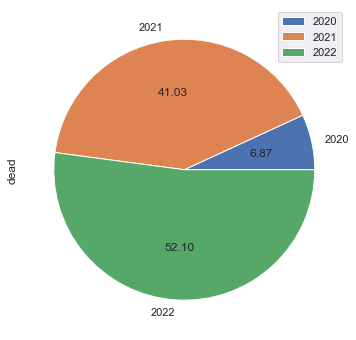

In [91]:
# Porcentaje de muertos durante los 3 años
df_3 = df_AllData
df_AllData['date'] = pd.to_datetime(df_3['date'])
df_groupByYear = df_3.groupby([df_3['date'].dt.year]).sum()
df_groupByYear
plot = df_groupByYear.plot.pie(y='dead', figsize=(11, 6), autopct='%.2f')
